다음의 노트북을 필사했습니다.  
https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

# Introduction: Home Credit Default Risk Competition

이 노트북은 머신러닝 대회나 문제에 대해서 친절한 소개를 원하는 새로운 사람들을 위한 것입니다. 저는 일부러 복잡한 모델이나 많은 데이터를 join하지 않도록 피했으며 이로써 머신러닝을 어떻게 시작해야 하는지에 대한 기초를 보여줄 것입니다.

이 노트북에서 우리는 캐글에서 현재 개최한 Home Credit default risk 머신러닝 대회를 처음 볼 것입니다. 이 대회의 목적은 과거 대출 신청 데이터를 사용해 신청자가 대출을 값을 수 있을지 없을지를 예측할 것입니다. 이는 표준 지도 분류 과제입니다.  
* **Supervised**: 레이블은 training data에 포함되며 목표는 모델을 배우도록 학습시켜 피처들의 레이블을 예측하는 것입니다.  
* **Classification**: 레이블은 이진 변수이며 0(제 때 대출을 값는 것), 1(대출을 값는데 어려움을 겪는 것) 입니다.

# Data

7개의 서로 다른 데이터의 Source가 있습니다.  
* `application_train/application_test`: Home Credit에 대한 각각의 대출 신청에 대한 정보이며 주요 트레이닝, 테스팅 데이터입니다. 각각의 대출은 고유의 행이 있으며 이 행은 `SK_ID_CURR` 피처에 의해 식별됩니다. 트레이닝 신청 데이터는 0과 1을 나타내는 `TARGET`과 함께 제공됩니다.  
* `breau`: 다른 금융 기관으로부터의 고객의 이전 신용을 고려한 데이터입니다. 각각의 이전 신용은 bureau에서 고유의 행을 갖습니다. 하지만 신청 데이터에서 하나의 대출은  다수의 이전 신용을 가질 수 있습니다.  
* `bureau_balance`: bureau에서 이전 신용에 대한 월간 데이터입니다. 각각의 행은 이전 대출에 대한 한달치 이며 단일의 이전 신용도는 다수의 행을 가질 수 있고, 한달에 하나씩입니다.  
* `previous_application`: 신청 데이터에서 대출을 가진 Home Credit의 고객에 대한 이전 대출 신청입니다. 신청 데이터에서 각각의 현재 대출은 다수의 이전 대출을 가질 수 있습니다. 가각의 이전 신청은 하나의 행을 가지며 `SK_ID_PREV` 피처에 의해 식별됩니다.  
* `POS_CASH_BALANCE`: 이전 판매 시점이나 현금 대출에 대한 월간 데이터입니다. 고객이 Home Credit에 대해 가지고 있었던. 각각의 행은 한달치입니다. 이전 시점의 판매나 현금 대출에 대해서. 그리고 하나의 이전 대출은 다수의 행을 가질 수 있습니다.  
* `credit_card_balance`: 이전 신용카드에 대한 월간 데이터입니다. 고객이 Home Credit에 가졌던. 각각의 행은 신용카드 잔액에 대한 한달치이며 단일 credit card는 많은 행을 가질 수 있습니다.  
* `installments_payment`: Home Credit에 대한 이전 대출의 납입 내역입니다. 각각의 납입이 이루어질 때, 혹은 납입이 이루어지지 않을 때 마다 하나의 행이 만들어집니다.  
아래의 다이어그램은 어떻게 데이터가 연관돼 있는지 보여줍니다.

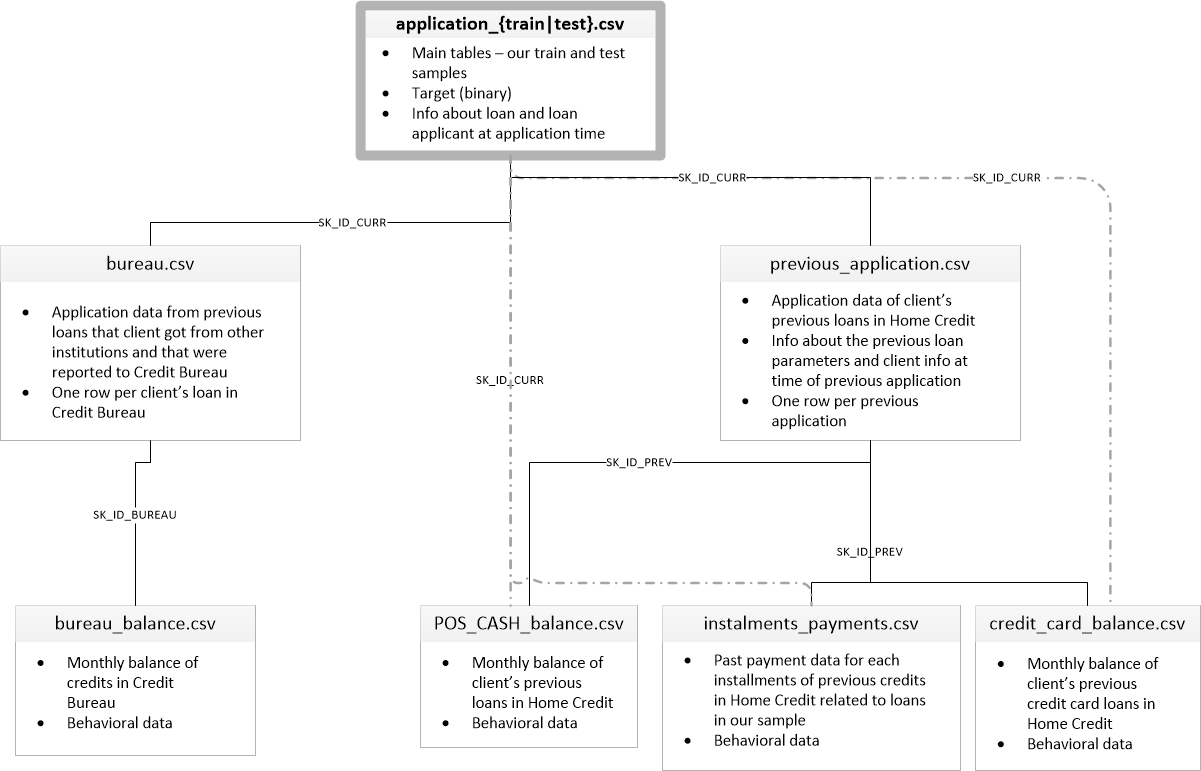

더욱이 모든 컬럼에 대한 정의와 제출 파일의 예제가 제공됩니다. (csv 파일로)

이 노트북에서는 붙여서 사용할 것입니다. 오직 주요 신청의 트레이닝, 테스팅 데이터를. 비록 진지하게 경쟁하려는 희망을 갖고 있더라도 지금은 붙여서 하나의 파일을 만들 것입니다. 이렇게 함으로써 더욱 관리하기 쉬워질 것입니다. 이는 향상시킬 여지가 있는 baseline을 구축하도록 만들 것입니다. 지금 이러한 프로젝트에서 최선은 문제에 대한 이해도를 한 번에 조금씩 높여 나가는 것입니다. 모든 방식을 분리하기 보다는. 이렇게 되면 완전히 잃어버릴 것입니다.

## Metric: ROC AUC

일단 한 번 데이터에 대해 이해하게 되면(컬럼에 대한 설명을 읽음으로써 매우 많은 도움이 될 것입니다.) 우리는 메트릭을 이해할 필요가 있습니다. 이로써 submssion이 정의될 것입니다.

ROC AUC는 아마 위축되게 들릴 수 있습니다. 하지만 이는 상대적으로 쉽습니다. 일단 두 개의 개별적인 개념을 머릿속에 넣게 되면. Reciever Operating Characteristic(ROC) 곡선은 표현됩니다. True positive 대 False positive 비율로

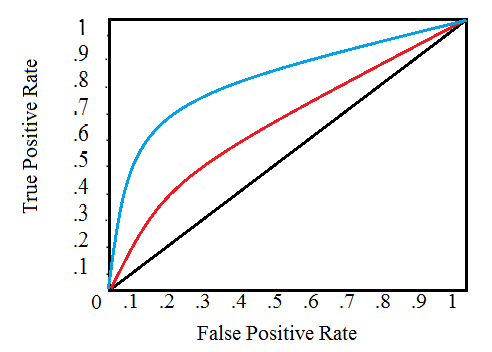

## Imports

In [30]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import os

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

## Read in Data

첫 번째로 모든 가능한 데이터 파일을 리스트화할 수 있습니다. 총 9개의 파일이 있습니다. 이 중 트레이닝을 위한 하나의 메인 파일과 테스팅을 위한 1개의 메인 파일이 있으며 1개의 제출 예시 파일, 그리고 6개의 다른 파일들이 있습니다. 이 6개의 파일은 각각의 대출에 대한 부가적인 정보를 포함합니다.

In [31]:
# List files available
temp_list = os.listdir('../Home Credit Default Risk/')
temp_list

['.ipynb_checkpoints',
 'application_test.csv',
 'application_train.csv',
 'bureau.csv',
 'bureau_balance.csv',
 'credit_card_balance.csv',
 'HomeCredit_columns_description.csv',
 'installments_payments.csv',
 'POS_CASH_balance.csv',
 'previous_application.csv',
 'sample_submission.csv',
 'Start Here_A Gentle Introduction.ipynb']

In [32]:
temp_list = temp_list[1:-2]
temp_list

['application_test.csv',
 'application_train.csv',
 'bureau.csv',
 'bureau_balance.csv',
 'credit_card_balance.csv',
 'HomeCredit_columns_description.csv',
 'installments_payments.csv',
 'POS_CASH_balance.csv',
 'previous_application.csv']

In [33]:
# Training data
app_train = pd.read_csv('../Home Credit Default Risk/application_train.csv')
print('Training data shape:', app_train.shape)
app_train.head()

Training data shape: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# Testing data featires
app_test = pd.read_csv('../Home Credit Default Risk/application_test.csv')
print('Testing data shape:', app_test.shape)
app_test.head()

Testing data shape: (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


테스트셋은 `TARGET` 컬럼과 상당히 부족하며 `TARGET` 컬럼이 없습니다.

# Exploratory Data Analysis

EDA는 제약을 두지 않은 프로세스이며 여기서 우리는 통계를 계산하며 추세와 이상탐지, 패턴, 또는 데이터 안의 관계를 찾아냅니다. EDA의 목적은 우리의 데이터가 말해줄 수 있는 부분을 배우는 것입니다. 이는 일반적으로 높은 정도의 overview로부터 시작합니다. 그다음 구체적인 영역으로 좁혀갑니다. 흥미로운 영역을 발견함에 따라서. 조사 결과는 아마 그 자체로 흥미로울 수 있으며 또는 결과는 어떤 모델을 쓸지에 대한 정보를 알려줄 수 있을 것입니다. 예를 들어 어떤 피처를 사용할지 도움을 줌으로써  

## Examine the Distribution of the Target Column

타겟은 우리가 무엇을 예측할지 묻는 것입니다.  
* 대출이 제 때 갚아진 것을 뜻하는 0  
* 고객이 납입에 어려움을 겪는 것을 가리키는 1  
첫번째로 각 범주에 속하는 수를 조사할 수 있을 것입니다.

In [35]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

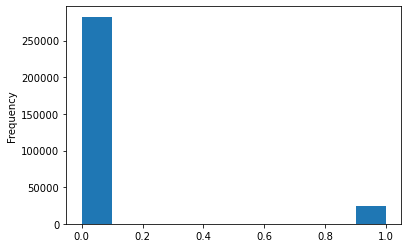

In [36]:
app_train['TARGET'].astype(int).plot.hist();

이러한 정보로부터 class가 불균형한 문제를 겪는다는 것을 알 수 있습니다. 훨씬 더 많은 대출이 제 때 갚아졌습니다. 갚아지지 않은 대출에 비해서. 우리가 더욱 정교한 머신러닝 모델을 가졌다면 class들에 가중치를 중 수 있습니다. 어떤 표현이냐면 data가 불균형하다는 신호 

## Examine Missing Values

다음으로 각각의 컬럼의 결측치 퍼센티지와 갯수를 살펴볼 수 있습니다.

In [37]:
# Function to calculate missing values by column funct

def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values / (결측치 개수 / 전체 길이) * 100
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # make a table with the results
    mis_val_tabel = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_tabel.rename(
    columns = {0: 'Missing Values', 1: '% of Total Values'})
    
    # Sort the table by percentage of missing descending / 결측치 퍼센트가 0이 아닌 것들을 정렬함
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
    
    # print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns. \n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
                          "columns that have missing values.")
          
    # return the dataframe with missing information
    return mis_val_table_ren_columns

In [38]:
mis_val = app_train.isnull().sum()

mis_val_percent = 100 * app_train.isnull().sum() / len(app_train)

mis_val_tabel = pd.concat([mis_val, mis_val_percent], axis=1)

mis_val_tabel

,0,1
SK_ID_CURR,0,0.000000
TARGET,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
CODE_GENDER,0,0.000000
FLAG_OWN_CAR,0,0.000000
...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631


In [39]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns. 
There are 67columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


머신러닝 모델을 만들 때가 되면 이러한 결측치를 채워야 합니다. 나중에 결측치를 다룰 수 있는  XGBoost와 같은 모델을 사용할 것입니다. 또 다른 옵션은 높은 비율의 결측치가 있는 컬럼을 삭제하는 것입니다. 비록 이러한 컬럼들이 모델에 도움이 될지 사전에 아는 것이 불가능할 지라도. 그러므로 지금은 이러한 컬럼들을 놔두겠습니다. 

## column Types

각각의 데이터 타입에 따른 컬럼들의 갯수를 보겠습니다. `int64` 그리고 `float64`는 numeric 변수입니다. (이들은 이산적이거나 연속적일 수 있습니다.) `object` 컬럼은 문자를 포함하는데 이는 categorical features입니다.

In [40]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

이제 고유한 항목의 수를 살펴 보겠습니다. 각각의 `object` 컬럼에 대해서

In [41]:
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

대부분의 범주형 변수는 상대적으로 적은 고유 항목을 가졌습니다. 우리는 다루는 방법을 찾아내야 합니다. 이러한 범주형 변수들을

## Encoding Categorical Variables

### Label Encoding and One-Hot Encoding

2개의 고유 범주가 있는 어떤 범주형 변수에 대해 우리는 label encoding을 사용하고 그 이상의 고유 범주가 있는 것에는 원-핫 인코딩을 사용할 것입니다.

In [42]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # if 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [43]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape:', app_train.shape)
print('Testing Features shape:', app_test.shape)

Training Features shape: (307511, 243)
Testing Features shape: (48744, 239)


### Aligning Training and Testing Data

train, test 데이터에서 똑같은 컬럼이 필요합니다. 원-핫 인코딩은 더 많은 컬럼을 생성했습니다. 트레이닝 데이터에서. 왜냐하면 테스트 데이터에 표현되지 않은 카테고리가 있었기 때문입니다. 트레이닝 데이터에 있는 이 컬럼을 지우기 위해서는 데이터 프레임을 `align` 해야 합니다. 첫번째로 트레이닝 데이터에서 타겟 컬럼을 추출하겠습니다.(이는 테스팅 데이터에 없지만 이 정보를 가지고 있어야 하기 때문입니다.) align을 할 때 `axis=1`로 설정하면 데이터 프레임이 행이 아니라 컬럼을 기준으로 정렬됩니다.

align 매서드 참고 링크  
https://kongdols-room.tistory.com/164  

align에서 join 파라미터는 inner, left, right가 있다. 이들은 데이터프레임을 합치는 것이 아니라 join 기준에 따라 각자의 데이터 프레임의 컬럼 혹은 행을 변형한다.

In [44]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape:', app_train.shape)
print('Testing Features shape:', app_test.shape)

Training Features shape: (307511, 240)
Testing Features shape: (48744, 239)


트레이닝, 테스트 데이터셋은 이제 같은 피처를 가졌습니다. 이들은 머신러닝에 필요합니다. 피처의 수는 원-핫 인코딩으로 인해 상당히 증가했습니다. 어느 시점에서는 아마 차원 축소를 시도하고 싶을 것입니다. 데이터셋의 사이즈를 줄이기 위해서

## Back to Exploratory Data Analysis

### Anomalies

EDA를 함에 있어서 우리가 항상 경계하고 싶은 한 가지 문제는 데이터 안에 있는 변칙입니다. 이들은  아마도 잘못 입력된 숫자, 설비를 측정하는데 있어서의 에러, 또는 유효하지만 매우 큰 숫자 때문일 것입니다. 이상을 정량적으로 돕는 한 가지 방법은 `describe` 메서드를 이용해 컬럼의 통계량을 살펴보는 것입니다. `DAYS_BIRTH` 컬럼의 숫자는 음수입니다. 왜냐하면 이들은 현재 대출 신청과 비교해 기록되었기 때문입니다. 이들의 년 단위 통계를 보려면 -1을 곱해주고 일(day) 수로 나눠주는 것입니다.

In [45]:
app_train['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [46]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

이러한 나이는 합리적인듯 보입니다. 나이의 상한이나 하한에 대해서 특이값이 없습니다. 채용에 대한 일수에 대해서는 어떨까요?

In [47]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

이들은 맞지 않는 것 같아 보입니다. 최대값이 positive일 뿐 아니라 1000년입니다.

Text(0.5, 0, 'Days Employment')

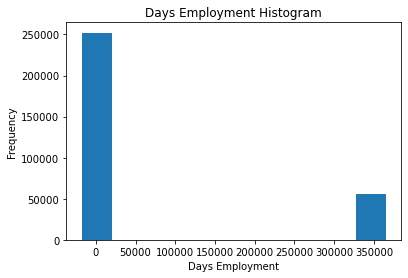

In [48]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment')

변칙적인 클라이언트의 부분 집합을 취하여 나머지 클라이언트보다 더 높은 또는 낮은 파산 비율을 갖는 경향이 있는지 알아보겠습니다.

In [49]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]

print('The non-anomalies default on %0.2f%% if loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% if loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


흥미로운 결과입니다. 이상치는 파산하는 비율이 낮다는 것이 드러났습니다.

이상치를 다루는 것은 정확한 상황에 달려 있으며, 정해진 방식이 없습니다. 한 가지 가장 안전한 접근은 이상치를 결측치로 세팅하는 것이며 이후 머신러닝을 하기 전에 imputation을 이용해 채우는 것입니다. 이번 경우에는 모든 이상치가 정확히 똑같은 값을 가지고 있기 때문에, 이러한 대출이 무언가 공통된 것을 공유하는 경우에 대비하여 이들을 같은 값으로 채우길 원합니다. 이상치는 약간의 중요성을 가지고 있는듯 하며, 따라서 우리는 머신러닝 모델에 실제로 이러한 값들을 채웠는지 말하고 싶습니다. 해결책으로 이상치를 숫자가 아닌(np.nan)으로 채울 것이며 그다음 해당 값이 이상치였는지 아닌지 가르키는 새로운 불 컬럼을 만들 것입니다.

Text(0.5, 0, 'Days Employment')

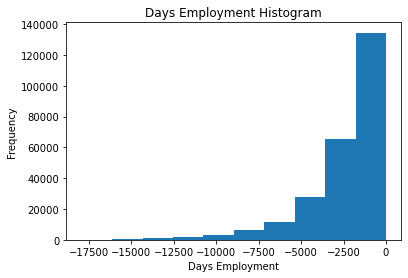

In [50]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243 

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment')

In [51]:
app_train['DAYS_EMPLOYED_ANOM']

0         False
1         False
2         False
3         False
4         False
          ...  
307506    False
307507     True
307508    False
307509    False
307510    False
Name: DAYS_EMPLOYED_ANOM, Length: 307511, dtype: bool

분포는 기대했던 것에 비해서 훨씬 더 정렬된듯 보입니다. 또한 새로운 컬럼을 생성해 주었습니다. 이는 모델에게 이러한 값들이 원래는 이상치였다는 것을 말해줍니다.(왜냐하면 우리는 일부 값들을 nan으로 채워야하기 때문이며, 아마 컬럼의 중앙값일 것입니다.)  데이터프레임 안에 있는 또 다른 DAYS가 있는 컬럼들은 또렷한 특이값 없이 예측할 수 있는 것 같습니다.

기억해야할 중요한 것이 있는데, 트레이닝 데이터에 대해서 하는 모든 것들은 테스팅 데이터에도 해주어야 한다는 것입니다. 테스팅 데이터에 대해서 새로운 컬럼을 생성하며 기존 열을 `np.nan`으로 채워줍시다.

In [52]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


### Correlations

우리는 범주형 변수와 이상치에 대해서 다루었습니다. EDA를 계속 진행해 봅시다. 데이터를 이해할 수 있는 한 가지 방식은 피처간의, 혹은 타겟간의 상관관계를 찾는 것입니다. 모든 변수와 타겟에 대해 피어슨 상관계수를 계산할 수 있습니다. `.corr` 메서드를 이용해서.

상관계수는 피처들의 "관련성"을 나타내는데 있어서 가장 좋은 방식은 아니지만 이는 데이터 안에 있을 수 있는 관계에 대한 아이디어를 줍니다. 상관계수 절대값에 대한 일반적인 해석은 다음과 같습니다.

* .00 - .19 "very weak"  
* .20 - .39 "week"  
* .40 - .59 "moderate"
* .60 - .79 "strong"
* .80 - 1.0 "very strong"

In [59]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations: \n', correlations.tail(15))
print('\n Most Negative Correlations: \n', correlations.head(15))

Most Positive Correlations: 
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

 Most Nega

더욱 의미 있는 상관관계에 대해서 봅시다. `DAYS_BIRTH`는 양의 상관관계가 가장 많습니다. 대회에서 주어진 서류를 보면 `DAYS_BIRTH`는 대출이 이루어졌을 때의 고객의 나이를 일로 환산한 다음 -를 붙인 것입니다. 상관관계는 양이지만 이들의 실제적인 값은 음입니다. 이는 다음을 의미합니다. 고객이 나이가 들어갈 수록 대출을 값지 않을 확률이 낮아진다(즉 target == 0). 이는 약간 햇갈립니다. 따라서 해당 피처에 대해 절댓값을 취해주면 상관관계는 음이 될 것입니다.

### Effect of Age on Repayment

In [61]:
# Find the correlation of the positive days since birth and target

app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982712

고객의 나이가 증가할 수록 타겟에 대해 음의 선형 상관관계가 있습니다. 이는 고객의 나이가 증가함에 따라 이들이 되값는 대출이 더욱 흔해짐을 의미합니다.

이 변수를 살펴 보는 것으로 시작합니다. 먼저 나이에 대한 히스토그램을 만들 수 있습니다. x축에는 년도를 넣음으로써 이해를 더욱 쉽게 만들 것입니다.

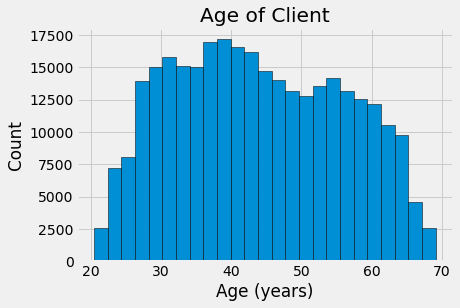

In [65]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

모든 연령이 합리적이기 때문에 이상치가 없다는 것 외에 나이에 대한 분포 자체만으로는 이외의 다른 것을 말해주지 않습니다. 타겟에 대한 나이의 효과를 시각화하기 위해서는 KED(kernel density estimation plot)을 사용하며 이들은 타겟의 값에 대해서 색깔이 매겨집니다. kernel density estimate plot은 하나의 변수에 대한 분포를 보여주며 히스토그램이 smoothed된 것으로 생각할 수 있습니다.(이는 보통 가우시안 커널을 계산하여 생성되는데, 각각의 데이터 포인트에 대해서 개별적으로 커널의 평균 값을 계산한 다음 하나의 smooth 곡선을 만들어냅니다.) seaborn의 `kdeplot`을 이용해 그래프를 그릴 것입니다.

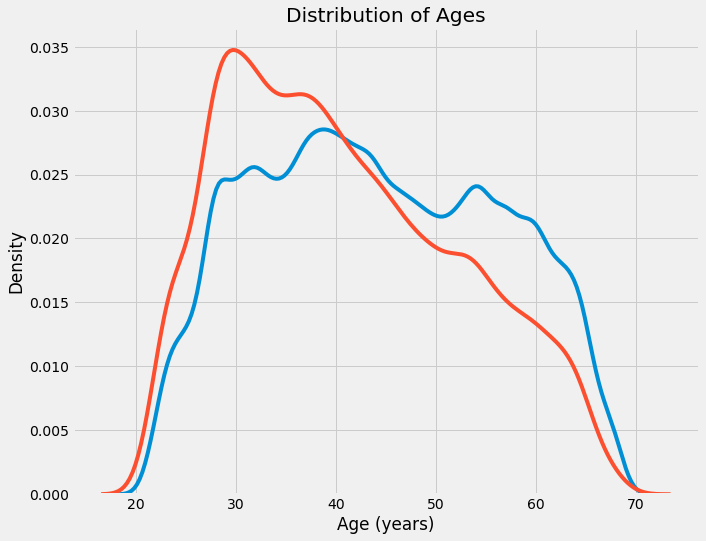

In [66]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which where not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

target == 1 곡선은 범위의 끝에서 어린 쪽으로 왜곡됐습니다. 비록 이는 주목할 만한 상관관계는 아니지만, 해당 변수는 머신러닝 모델에 있어서 유용할 것으로 보입니다. 왜냐하면 이는 타겟에 영향을 주기 때문입니다. 또다른 방식으로 관계를 살펴봅시다. (나이 계층에 따라 대출을 갚는데 실패하는 평균)

해당 그래프를 만들기 위해 먼저 `cut`을 이용해 나이 카테고리를 각각 5년의 bins로 만듭니다. 그리고 각각의 bin에 대해 타겟의 평균 값을 계산합니다. 이는 각각의 나이 카테고리에 대해 갚지 않은 대출의 비율을 말해줄 것입니다.

In [86]:
 app_train[['TARGET', 'DAYS_BIRTH']]

,TARGET,DAYS_BIRTH
0,1,9461
1,0,16765
2,0,19046
3,0,19005
4,0,19932
...,...,...
307506,0,9327
307507,0,20775
307508,0,14966
307509,1,11961


In [98]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [99]:
np.linspace(20, 70, num = 11)

array([20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.])

In [100]:
# Group by the bin and calculate averages
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


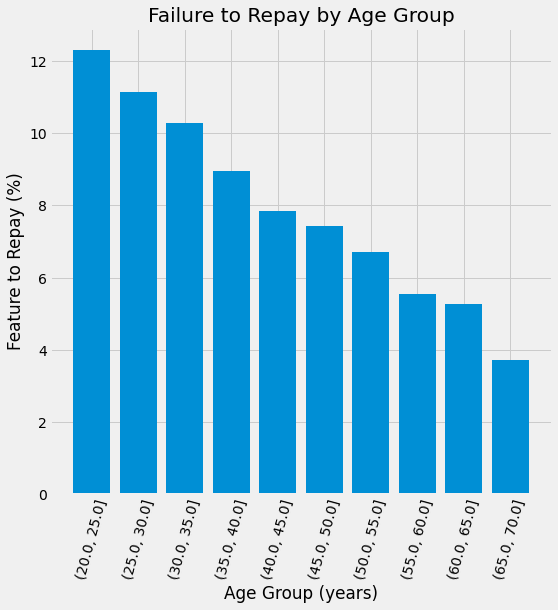

In [102]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Feature to Repay (%)')
plt.title('Failure to Repay by Age Group');

명확한 추세가 있습니다: 나이가 어딘 신청자는 대출을 갚을 가능성이 적습니다. 해당 비율은 세 개의 가장 어린 그룹에서 10%가 넘으며 가장 나이 많은 그룹에서 5% 아래입니다.

### Exterior Sources

타겟과 관련해 음의 상관관계가 가장 큰 3가지 수는 `EXT_SOURCE_1`, `EXT_SOURCE_2`, `EXT_SOURCE_3`입니다. 대회 문서에 따르면 이러한 피처는 외부의 데이터 소스로부터 정규화된 것을 나타냅니다. 이것이 무엇을 뜻하는지 정확히 확인할 수는 없지만 이는 아마 다양한 데이터 소스를 이용해 만들어진 누적되는 종류의 신용 등급일 것입니다.

먼저 타겟에 대한 `EXT_SOURCE` 피처의 상관관계를 볼 수 있습니다.

In [103]:
# Extract the EXT_SOURCE variable and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


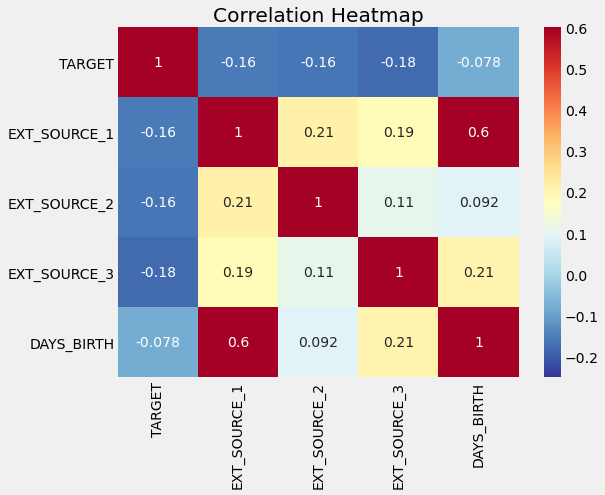

In [104]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

3개의 `EXT_SOURCE`target과 음의 상관관계가 있습니다. 이는 `EXT_SOURCE`가 증가함에 따라 고객이 대출을 갚을 확률이 증가함을 의미합니다. 또한 `DAYS_BIRTH`가 `EXT_SOURCE_1`과 양의 상관관계를 갖는 것을 볼 수 있는데 이는 해당 소스의 요인 중 하나가 고객의 나이일 수 있음을 의미합니다.

다음으로 각각의 세 피처에 대해 target 값에 대해 색깔이 입혀진 분포를 볼 수 있습니다. 이는 target에 해당 변수들이 미치는 영향을 시각화할 수 있을 것입니다.

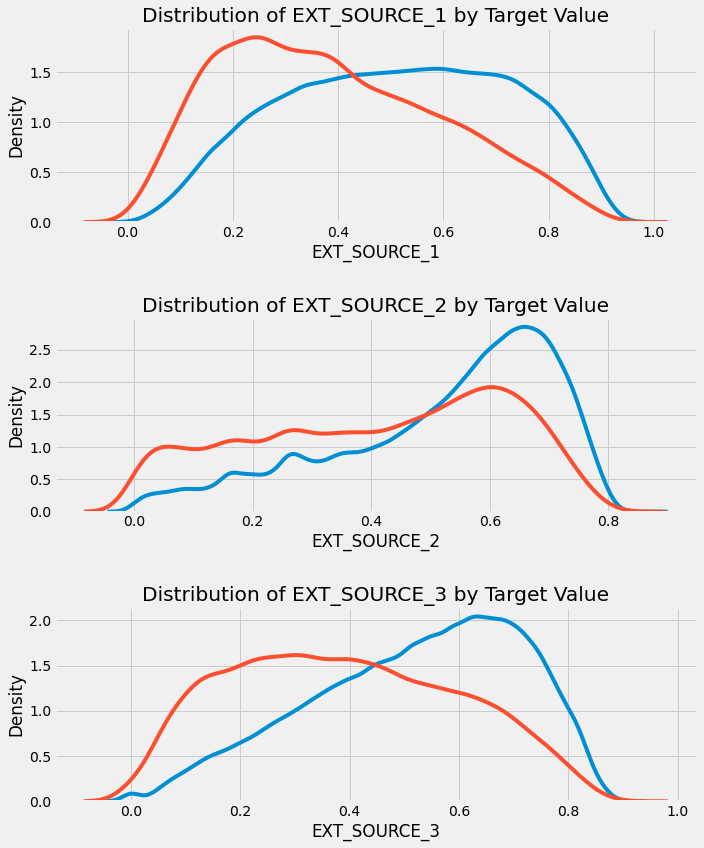

In [110]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i+1)
    #plot repain loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
# 원래 제목이 서로 겹치게 나타나는데 이렇게 하면 겹치지 않음
plt.tight_layout(h_pad = 2.5)

* 파란색 = target == 0
* 빨간색 = target == 1

`EXT_SOURCE_3`은 타겟값 간에 가장 큰 차이가 있음을 보여줍니다. 신청자가 대출을 값을 가능성에 대한 어느 정도의 관계를 해당 피처를 통해 확실히 볼 수 있습니다. 관계는 매우 강하지는 않습니다. 이들 모두는 매우 약하게 고려되지만 이러한 변수들은 머신러닝 모델이 신청자가 대출을 갚을지 아닐지를 예측하는데 여전히 유용합니다.

### Paris Plot

마지막 탐색적 그래프로 `EXT_SOURCE`와 `DAYS_BIRTH`에 대해서 pairs plot을 만들 수 있습니다. Pairs Plot은 매우 좋은 탐색 툴인데 하나의 변수에 대한 분포 뿐만 아니라 여러 쌍의 변수에 대한 관계 또한 볼 수 있게 해주기 때문입니다. 

In [114]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                        xy=(.2, .8), xycoords=ax.transAxes,
                        size = 20)

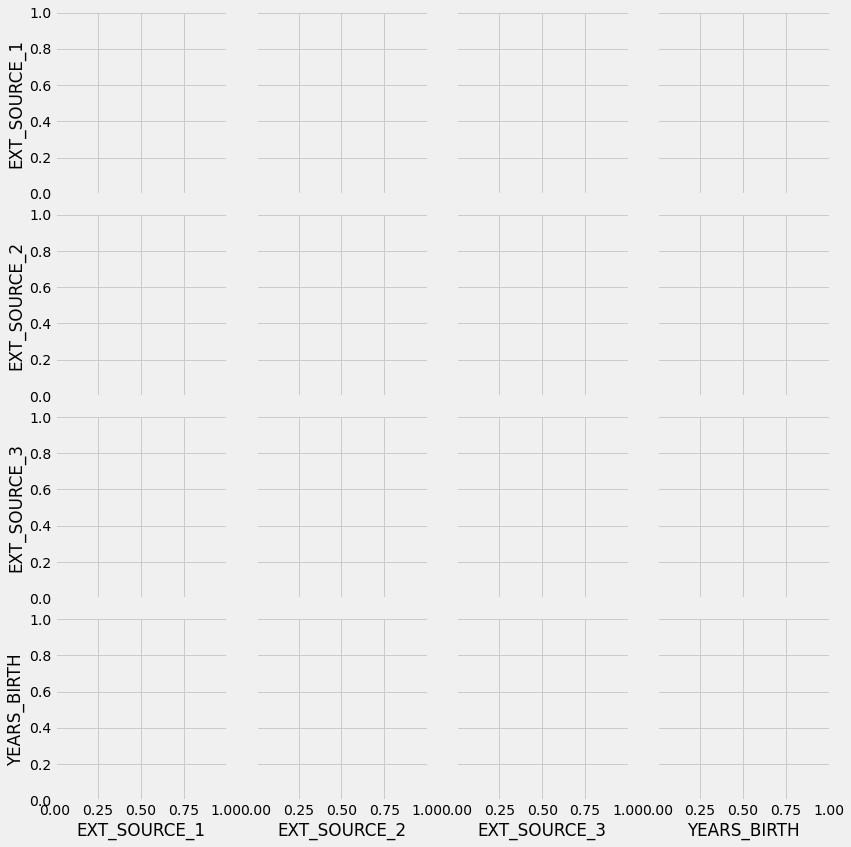

In [115]:
# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                           hue = 'TARGET',
                           vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

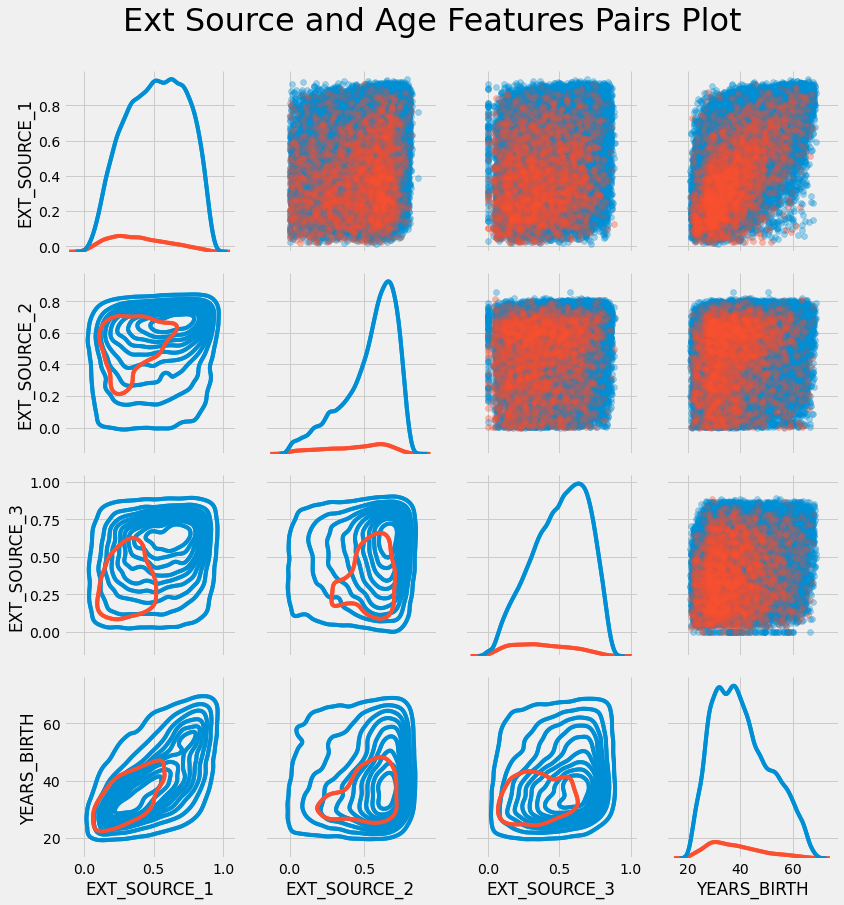

In [121]:
# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot 오래걸림
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

* 빨간색: 대출이 갚아지지 않음  
* 파란색: 대출이 갚아짐  
데이에서 다른 관계를 볼 수 있습니다. `EXT_SOURCE_1`, `DAYS_BIRTH`는 중간 정도의 선형 관계가 나타납니다. 이는 해당 피처가 아마 고객의 나이를 고려한다는 것을 가르킵니다.